In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# If using Google Colab, upload the file
from google.colab import files
uploaded = files.upload()

# Read the Iris CSV
df = pd.read_csv("Iris.csv")

# Preview data
df.head()


Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Drop 'Id' if exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Encode target class
label_enc = LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'])

# Features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)


✅ Accuracy: 100.0 %


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


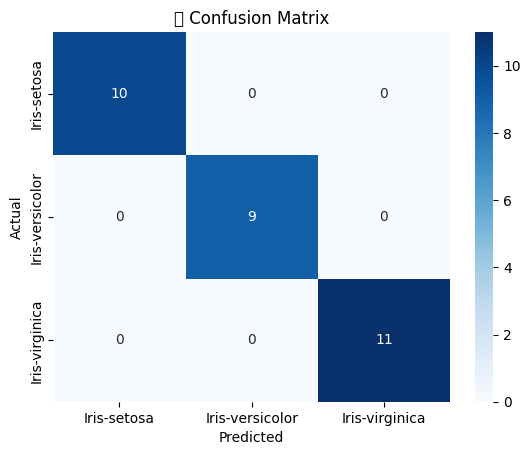


📄 Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [5]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_enc.classes_,
            yticklabels=label_enc.classes_)
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


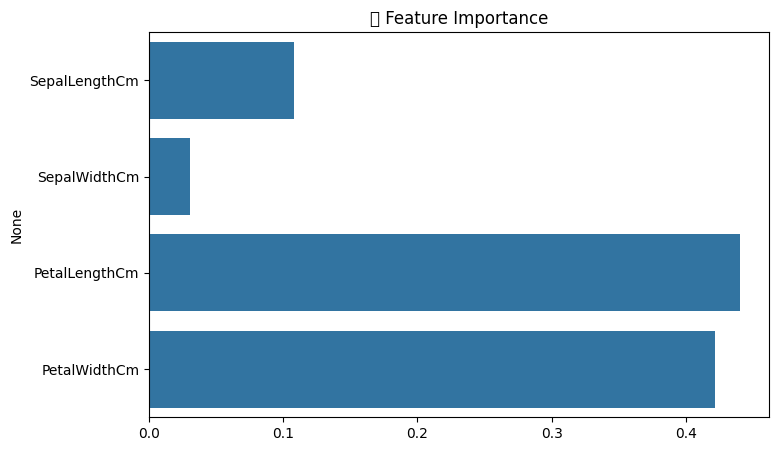

In [6]:
importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("🌿 Feature Importance")
plt.show()
